## Approach 1: 

* Train a (convolutional) neural network to identify whether or not there is a human in the image.
* Train a (convolutional) neural network to identify whether or not there is a castle in the image.
* Train a (convolutional) neural network to identify whether the image is taken indoors or outdoors.
* Train a (convolutional) neural network to identify the landscape of the image (e.g. city, suburb, or nature/rural)
* Choose at least 10 other features (or feature categories) that you suspect might be useful for differentiating Alex and Kelly's photos, and train individual (convolutional) neural networks to identify those.

### Import Libraries and Data

In [18]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.preprocessing import image

# Set data directory
data_dir = '/Users/ruojiakuang/Desktop/GSB 545 Advanced ML/Lab 6 Data/Alex_Kelly_Pics'

### Split training and validating data then Create and Train CNN Model

In [19]:
def load_and_preprocess_images(data_dir, target_size=(128, 128), batch_size=32, subset='training'):
    datagen = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2)
    generator = datagen.flow_from_directory(
        data_dir,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='binary',
        subset=subset,
        shuffle=True
    )
    return generator

# Loading and preprocessing training and validation data
train_generator = load_and_preprocess_images(data_dir, subset='training')
val_generator = load_and_preprocess_images(data_dir, subset='validation')

Found 469 images belonging to 3 classes.
Found 116 images belonging to 3 classes.


In [20]:
def create_cnn_model(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def train_feature_extraction_model(model, train_gen, val_gen, epochs=10):
    model.fit(train_gen, validation_data=val_gen, epochs=epochs)
    return model

input_shape = (128, 128, 3)

# Train models with different features
person_model = create_cnn_model(input_shape)
person_model = train_feature_extraction_model(person_model, train_generator, val_generator)

castle_model = create_cnn_model(input_shape)
castle_model = train_feature_extraction_model(castle_model, train_generator, val_generator)

indoor_outdoor_model = create_cnn_model(input_shape)
indoor_outdoor_model = train_feature_extraction_model(indoor_outdoor_model, train_generator, val_generator)

scenery_model = create_cnn_model(input_shape)
scenery_model = train_feature_extraction_model(scenery_model, train_generator, val_generator)

# Train models with more features
day_night_model = create_cnn_model(input_shape)
day_night_model = train_feature_extraction_model(day_night_model, train_generator, val_generator)

flower_model = create_cnn_model(input_shape)
flower_model = train_feature_extraction_model(flower_model, train_generator, val_generator)

animal_model = create_cnn_model(input_shape)
animal_model = train_feature_extraction_model(animal_model, train_generator, val_generator)

tree_model = create_cnn_model(input_shape)
tree_model = train_feature_extraction_model(tree_model, train_generator, val_generator)

car_model = create_cnn_model(input_shape)
car_model = train_feature_extraction_model(car_model, train_generator, val_generator)

sky_model = create_cnn_model(input_shape)
sky_model = train_feature_extraction_model(sky_model, train_generator, val_generator)

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 504ms/step - accuracy: 0.4097 - loss: 70.5038 - val_accuracy: 0.4828 - val_loss: -1.6040
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 449ms/step - accuracy: 0.4605 - loss: -4.0291 - val_accuracy: 0.4569 - val_loss: -48.5956
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 432ms/step - accuracy: 0.4783 - loss: -105.7389 - val_accuracy: 0.4138 - val_loss: -681.1088
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 419ms/step - accuracy: 0.4651 - loss: -1088.4991 - val_accuracy: 0.4655 - val_loss: -6138.5073
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 424ms/step - accuracy: 0.4502 - loss: -9491.5664 - val_accuracy: 0.4052 - val_loss: -33677.5000
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 441ms/step - accuracy: 0.4551 - loss: -51373.6328 - val_accuracy: 0.4138 - val_loss: -140006.2344
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 436ms/step - accuracy: 0.4533 - loss: -208672.9688 - val_accuracy: 0.5000 - val_loss: -488785.4375
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 422ms/step 

In [22]:
def extract_features(model, data_generator):
    data_generator.reset()
    features = model.predict(data_generator)
    return features

# Extract various features
person_features = extract_features(person_model, val_generator)
castle_features = extract_features(castle_model, val_generator)
indoor_outdoor_features = extract_features(indoor_outdoor_model, val_generator)
scenery_features = extract_features(scenery_model, val_generator)
day_night_features = extract_features(day_night_model, val_generator)
flower_features = extract_features(flower_model, val_generator)
animal_features = extract_features(animal_model, val_generator)
tree_features = extract_features(tree_model, val_generator)
car_features = extract_features(car_model, val_generator)
sky_features = extract_features(sky_model, val_generator)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 236ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 216ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 204ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 194ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 194ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 194ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 192ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 208ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 201ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 205ms/step


In [24]:
# Splicing all features together
X = np.column_stack([person_features, castle_features, indoor_outdoor_features, scenery_features,
                     day_night_features, flower_features, animal_features, tree_features,
                     car_features, sky_features])
y = val_generator.classes

# Divide training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train classification models (such as random forests)
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X_train, y_train)

# Evaluation model
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

              precision    recall  f1-score   support

           0       0.54      0.58      0.56        12
           1       0.50      0.56      0.53         9
           2       0.00      0.00      0.00         3

    accuracy                           0.50        24
   macro avg       0.35      0.38      0.36        24
weighted avg       0.46      0.50      0.48        24

Accuracy: 0.5


The model performs moderately well on classes 0 and 1 but fails completely on class 2.
Overall accuracy is 50%.
The macro average shows lower precision and recall, indicating poor performance on class 2 affects the overall metric.
The weighted average gives a more balanced view considering the number of instances per class.

In [26]:
# Load and preprocess test images
# test_dir = os.path.join(data_dir, 'test')
test_dir = '/Users/ruojiakuang/Desktop/GSB 545 Advanced ML/Lab 6 Data/Test'
test_generator = load_and_preprocess_images(test_dir, batch_size=1)

# Extracting features from test images
test_person_features = extract_features(person_model, test_generator)
test_castle_features = extract_features(castle_model, test_generator)
test_indoor_outdoor_features = extract_features(indoor_outdoor_model, test_generator)
test_scenery_features = extract_features(scenery_model, test_generator)
test_day_night_features = extract_features(day_night_model, test_generator)
test_flower_features = extract_features(flower_model, test_generator)
test_animal_features = extract_features(animal_model, test_generator)
test_tree_features = extract_features(tree_model, test_generator)
test_car_features = extract_features(car_model, test_generator)
test_sky_features = extract_features(sky_model, test_generator)

# All features of splicing test images
X_test_final = np.column_stack([test_person_features, test_castle_features, test_indoor_outdoor_features,
                                test_scenery_features, test_day_night_features, test_flower_features,
                                test_animal_features, test_tree_features, test_car_features, test_sky_features])

# Photographer for predicting test images
y_test_final_pred = classifier.predict(X_test_final)
y_test_final_pred

Found 16 images belonging to 1 classes.
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/Users/ruojiakuang/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


array([1, 0, 0, 1, 0, 0, 0, 2, 0, 1, 2, 0, 2, 2, 2, 0], dtype=int32)

### Prediction on Test Data

In [27]:
photographers = ['Alex', 'Kelly', 'Neither']

# Convert the predicted category index to the photographer's name
predicted_photographers = [photographers[class_index] for class_index in y_test_final_pred]

# Print prediction results
for i, photographer in enumerate(predicted_photographers):
    print(f"Photo {i+1} is predicted to be taken by: {photographer}")

Photo 1 is predicted to be taken by: Kelly
Photo 2 is predicted to be taken by: Alex
Photo 3 is predicted to be taken by: Alex
Photo 4 is predicted to be taken by: Kelly
Photo 5 is predicted to be taken by: Alex
Photo 6 is predicted to be taken by: Alex
Photo 7 is predicted to be taken by: Alex
Photo 8 is predicted to be taken by: Neither
Photo 9 is predicted to be taken by: Alex
Photo 10 is predicted to be taken by: Kelly
Photo 11 is predicted to be taken by: Neither
Photo 12 is predicted to be taken by: Alex
Photo 13 is predicted to be taken by: Neither
Photo 14 is predicted to be taken by: Neither
Photo 15 is predicted to be taken by: Neither
Photo 16 is predicted to be taken by: Alex


### Approach 2: 

Train a convolutional neural network directly to the images, with the output being the known photographer of the image.

In [30]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import os

# Dataset path(Change to your path)
base_dir = '/Users/ruojiakuang/Desktop/GSB 545 Advanced ML/Lab 6 Data/Alex_Kelly_Pics'

# Using data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=40.,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


# Calculate the number of samples in the training and validation sets
train_gen = train_datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical',
    subset='training'  # Designated as training set
)

val_gen = train_datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical',
    subset='validation'  # Specify as validation set
)

Found 469 images belonging to 3 classes.
Found 116 images belonging to 3 classes.


### Building the CNN Model

* Conv2D: Applies convolutional filters to the input image, capturing local patterns.
* MaxPooling2D: Reduces the spatial dimensions of the feature maps, retaining the most important information.
* Flatten: Flattens the 2D arrays into a 1D vector, preparing it for the fully connected layers.
* Dense: Fully connected layers that perform classification. The last layer uses a softmax activation function to output probabilities for each class.

In [32]:
# Building models
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='softmax'))  # Assuming there are three photographers

model.summary()

# Compile model
model.compile(
    optimizer='rmsprop',  # Using the RMSprop optimizer
    loss='categorical_crossentropy',  # Using cross entropy loss in multi classification problems
    metrics=['acc']  # Monitoring accuracy
)

# Set ModelCheckpoint callback to save the best model
checkpoint = ModelCheckpoint('/Users/ruojiakuang/Desktop/GSB 545 Advanced ML/Lab 6 CNN/best_model.keras', monitor='val_loss', mode='min', save_best_only=True)

# Training model
history = model.fit(
    train_gen,
    # steps_per_epoch=train_gen.samples // train_gen.batch_size,
    epochs=50,
    validation_data=val_gen,
    # validation_steps=val_gen.samples // val_gen.batch_size,
    callbacks=[checkpoint]
)

Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_83 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_83 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_84 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_84 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_85 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_85 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_86 (Conv2D)              │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_86 (MaxPooling2D) │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_27 (Flatten)            │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 512)            │     9,437,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,680,067 (36.93 MB)

 Trainable params: 9,680,067 (36.93 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


/Users/ruojiakuang/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


24/24 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - acc: 0.4944 - loss: 2.6554 - val_acc: 0.4397 - val_loss: 1.0422
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - acc: 0.4420 - loss: 1.0353 - val_acc: 0.4397 - val_loss: 1.0194
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 27s 989ms/step - acc: 0.4585 - loss: 1.0036 - val_acc: 0.4483 - val_loss: 1.0154
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 27s 997ms/step - acc: 0.3941 - loss: 1.0478 - val_acc: 0.4397 - val_loss: 1.0245
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 27s 975ms/step - acc: 0.4704 - loss: 1.0327 - val_acc: 0.4138 - val_loss: 1.0240
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 27s 979ms/step - acc: 0.4806 - loss: 1.0668 - val_acc: 0.4914 - val_loss: 1.0044
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - acc: 0.5052 - loss: 0.9513 - val_acc: 0.4138 - val_loss: 1.0383
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 27s 995ms/step - acc: 0.5163 - loss: 0.9442 - val_acc: 0.5086 - val_loss: 0.9682
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - acc: 0.5327 - lo

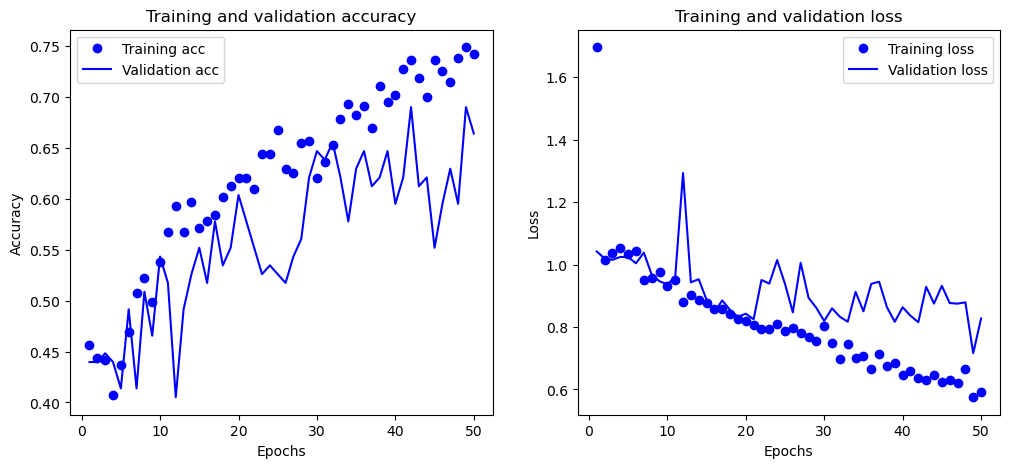

In [33]:
# Draw training accuracy and loss curve
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

When Epochs close to 48, the model has the greatest accuracy and relatively small loss. 

### Prediction on Test Data

In [40]:
predicted_classes

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 0, 1, 1, 2, 1, 1, 0, 1, 1, 0])

In [39]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

# Load model
model = keras.models.load_model('/Users/ruojiakuang/Desktop/GSB 545 Advanced ML/Lab 6 CNN/best_model.keras')  # Replace with your model save path

# Test set path
test_dir = '/Users/ruojiakuang/Desktop/GSB 545 Advanced ML/Lab 6 Data/Test'
# Prepare test data generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=1,  # Test sets typically use batch sizes of 1
    class_mode=None
)

# Using models for prediction
# Predict returns a probability distribution, and we use np.argmax to obtain the most likely category index
predicted_probabilities = model.predict(test_gen)
predicted_classes = np.argmax(predicted_probabilities, axis=1)

# Assuming the photographer's label index is known, for example:
# {'Alex': 0, 'Kelly': 1, 'Neither': 2}
photographers = ['Alex', 'Kelly', 'Neither']

# Convert the predicted category index to the photographer's name
predicted_photographers = [photographers[class_index] for class_index in predicted_classes]

# Print prediction results
for i, photographer in enumerate(predicted_photographers):
    print(f"Photo {i+1} is predicted to be taken by: {photographer}")

Found 20 images belonging to 1 classes.
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
Photo 1 is predicted to be taken by: Kelly
Photo 2 is predicted to be taken by: Kelly
Photo 3 is predicted to be taken by: Kelly
Photo 4 is predicted to be taken by: Alex
Photo 5 is predicted to be taken by: Kelly
Photo 6 is predicted to be taken by: Kelly
Photo 7 is predicted to be taken by: Kelly
Photo 8 is predicted to be taken by: Kelly
Photo 9 is predicted to be taken by: Kelly
Photo 10 is predicted to be taken by: Neither
Photo 11 is predicted to be taken by: Alex
Photo 12 is predicted to be taken by: Kelly
Photo 13 is predicted to be taken by: Kelly
Photo 14 is predicted to be taken by: Neither
Photo 15 is predicted to be taken by: Kelly
Photo 16 is predicted to be taken by: Kelly
Photo 17 is predicted to be taken by: Alex
Photo 18 is predicted to be taken by: Kelly
Photo 19 is predicted to be taken by: Kelly
Photo 20 is predicted to be taken by: Alex
